# Regression - How does a school's environment affect its students' Math Assessment scores?

Predict the percentage of students who will receive a 3+ on the math assessment

**Import Packages**

In [1]:
import pandas as pd
import numpy as np
import pickle

# libraries for cleaning and preprocessing data
from sklearn.preprocessing import StandardScaler

# libraries for modeling
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', message='numpy.dtype size changed')

## Data Preprocessing

**Read Data**

In [2]:
nyc_schools_math = pd.read_csv('Data/nyc_schools_math.csv')
nyc_schools_math.head()

,DBN,School Name,Supportive Environment Rating,Interesting and challenging curriculum,Effective teaching and learning,Effective school assessment,Clear communication - high expectations,Teacher collaboration,"Safety, inclusivity, social-emotional growth",Resource allocation and management,...,Strong Family-Community Ties Score,Trust Score,Borough,District,Level 1 %,Level 2 %,Level 3 %,Level 4 %,Level 3+ %,% Tested
0,01M015,P.S. 015 Roberto Clemente,4,4,3,3,3,3,4,4,...,3.80,3.99,Manhattan,1,11.940298,29.850746,32.835819,25.373135,58.208954,0.387283
1,01M019,P.S. 019 Asher Levy,3,4,4,4,4,4,4,4,...,4.10,3.55,Manhattan,1,23.595505,17.977528,29.213484,29.213484,58.426968,0.364754
2,01M020,P.S. 020 Anna Silver,2,2,2,2,3,2,3,3,...,3.64,3.12,Manhattan,1,41.509434,23.113207,17.924528,17.452829,35.377357,0.457883
3,01M034,P.S. 034 Franklin D. Roosevelt,2,2,2,2,3,3,2,3,...,3.33,2.32,Manhattan,1,54.751133,29.411764,10.859729,4.977376,15.837104,0.690625
4,01M063,The STAR Academy - P.S.63,3,4,3,4,3,4,4,4,...,4.01,3.95,Manhattan,1,18.750000,23.437500,37.500000,20.312500,57.812500,0.361582


**Define features and target**

In [3]:
X = nyc_schools_math.drop(['DBN', 'School Name', 'Level 1 %', 'Level 2 %',
                           'Level 3 %', 'Level 4 %', 'Level 3+ %', ],
                          axis=1)
y = nyc_schools_math['Level 3+ %']

**Encode categorical variables**

In [4]:
X = pd.get_dummies(X, drop_first=True)

**Train-test split**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=220)

**Standardize variables**

In [6]:
scale = StandardScaler()
X_train_scale = pd.DataFrame(scale.fit_transform(X_train),
                             columns=X.columns)
X_test_scale = pd.DataFrame(scale.transform(X_test),
                            columns=X.columns)

## Modeling

### Multiple Linear Regression

**Scikit-learn Regression**

In [7]:
linreg = LinearRegression().fit(X_train, y_train)

In [8]:
print('Train Score:', linreg.score(X_train, y_train))
print('Test Score:', linreg.score(X_test, y_test))
print('Intercept:', linreg.intercept_)
print('Coefficients:', linreg.coef_)

Train Score: 0.8183989188005184
Test Score: 0.7927703711393624
Intercept: -213.42592102140532
Coefficients: [ 2.44494740e+00 -1.93075756e+00 -1.71014860e+00 -3.89673957e-01
  2.07957331e-01  6.90400983e-01  4.32708299e-01  6.20270954e-01
  1.05256843e+00  2.99246058e-01  2.77700523e-01 -2.54075411e+01
 -4.26074321e+01  5.58440932e+00 -1.73511395e+01  6.94896396e+00
 -1.19620660e+01  4.92106330e+01  5.73598618e+00  1.69902934e+01
  2.82789016e+01  1.67644609e-01  5.57687870e+00  1.78505208e+02
  9.34353422e+00  9.48135825e+01 -2.41290274e+00  4.22452818e-01
  6.49850569e+00 -1.87098809e+00  1.01694219e+00 -3.51088682e-01
 -2.35172676e+01  5.05466456e+00  3.44963806e-01  3.30367192e+00
  6.88478399e+00]


**Statsmodels Linear Regression**

In [7]:
linreg_ols = sm.OLS(y_train,
                    sm.add_constant(X_train)).fit()

In [8]:
model_sum = linreg_ols.summary()
print(model_sum)

                            OLS Regression Results                            
Dep. Variable:             Level 3+ %   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     101.6
Date:                Tue, 14 Jan 2020   Prob (F-statistic):          2.38e-280
Time:                        21:27:13   Log-Likelihood:                -3228.1
No. Observations:                 872   AIC:                             6532.
Df Residuals:                     834   BIC:                             6713.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [9]:
# Create a dataframe from our regression results
lin_table = linreg_ols.summary().tables[1]
lin_table = pd.DataFrame(lin_table.data)
lin_table.columns = lin_table.iloc[0]
lin_table.drop(0, inplace=True)
lin_table = lin_table.set_index(lin_table.columns[0])
lin_table = lin_table.astype(float)
lin_table

,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
const,-213.4259,87.843,-2.430,0.015,-385.845,-41.007
Supportive Environment Rating,2.4449,0.881,2.774,0.006,0.715,4.175
Interesting and challenging curriculum,-1.9308,0.990,-1.951,0.051,-3.873,0.012
Effective teaching and learning,-1.7101,0.981,-1.742,0.082,-3.637,0.216
Effective school assessment,-0.3897,0.954,-0.408,0.683,-2.263,1.483
Clear communication - high expectations,0.2080,0.957,0.217,0.828,-1.670,2.086
Teacher collaboration,0.6904,1.124,0.614,0.539,-1.516,2.897
"Safety, inclusivity, social-emotional growth",0.4327,1.012,0.427,0.669,-1.554,2.420
Resource allocation and management,0.6203,1.266,0.490,0.624,-1.865,3.106


### Ridge Regression

In [12]:
lin_l2 = RidgeCV()
lin_l2.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [13]:
print('Model Score:', lin_l2.score(X_test, y_test))

Model Score: 0.8003444602679642


### SVR

In [14]:
svm_r = SVR(kernel='linear')

svm_r.fit(X_train_scale, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
print('Model Score:', svm_r.score(X_test_scale, y_test))

Model Score: 0.7979363283131794


**Tuning hyperparameters**

In [20]:
svm_grid = {'C': [0.01, 0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly']}

In [21]:
svm_gs = GridSearchCV(estimator=SVR(),
                      param_grid=svm_grid,
                      scoring='r2',
                      cv=5, verbose=1, n_jobs=-1)

svm_gs.fit(X_train_scale, y_train)

pickle.dump(svm_gs, open('Models/svm_math.sav', 'wb'))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    2.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=1)

In [24]:
svm_gs = pickle.load(open('Models/svm_math.sav', 'rb'))

print('Best params:', svm_gs.best_params_)
print('Train score: %.3f' % svm_gs.best_score_)
print('Test score: %.3f' % svm_gs.score(X_test_scale, y_test))

Best params: {'C': 1, 'kernel': 'linear'}
Train score: 0.799
Test score: 0.798


### Random Forest Regressor

In [34]:
rf_v = RandomForestRegressor(random_state=220)

rf_v.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=220, verbose=0,
                      warm_start=False)

In [35]:
print('Model Score:', rf_v.score(X_test, y_test))

Model Score: 0.7684040732122961


**Tuning hyperparameters**

In [42]:
rf_grid = {'n_estimators': [600, 700, 800],
          'max_depth': [18, 20, 22],
          'min_samples_split': [2, 3],
          'min_samples_leaf': [1, 2]}

In [43]:
rf_gs = GridSearchCV(estimator=RandomForestRegressor(random_state=220),
                     param_grid=rf_grid,
                     scoring='r2',
                     cv=5, verbose=1, n_jobs=-1)

rf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  5.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=220,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [18, 20, 22], 'min_sa

In [19]:
print('Best params:', rf_gs.best_params_)
print('Train score: %.3f' % rf_gs.best_score_)
print('Test score: %.3f' % rf_gs.score(X_test, y_test))

Best params: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 600}
Train score: 0.801
Test score: 0.786


## Findings

In [25]:
# create a DataFrame of the features and coefficients
svm_feat_imp = pd.DataFrame(zip(X_train_scale.columns,
                                svm_gs.best_estimator_.coef_[0],
                                np.abs(svm_gs.best_estimator_.coef_[0])),
                            columns=['Feature', 'Coefficient',
                                     'Absolute Coefficient'])

# sort values by the absolute coefficient
svm_feat_imp.sort_values(by=['Absolute Coefficient'],
                         ascending=True, inplace=True)

svm_feat_imp.head(10)

,Feature,Coefficient,Absolute Coefficient
34,Borough_Manhattan,-0.057114,0.057114
3,Effective school assessment,-0.090277,0.090277
8,"Identifying, tracking, and meeting goals",0.184108,0.184108
21,Principal experience at this school,0.192346,0.192346
13,Percent Self-Contained,0.237055,0.237055
35,Borough_Queens,0.237224,0.237224
4,Clear communication - high expectations,-0.296900,0.296900
26,Collaborative Teachers Score,-0.302846,0.302846
6,"Safety, inclusivity, social-emotional growth",0.366414,0.366414
5,Teacher collaboration,0.374126,0.374126


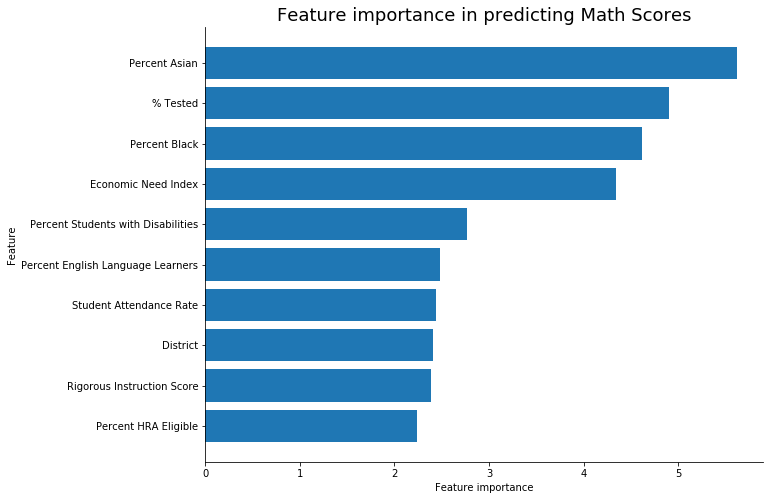

In [30]:
plt.figure(figsize=(10, 8))
plt.barh(svm_feat_imp['Feature'][-10:],
         svm_feat_imp['Absolute Coefficient'][-10:],
         align='center')
sns.despine(left=False, bottom=False)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.title(f'Feature importance in predicting Math Scores', fontsize=18)
plt.savefig('Images/math_feat_imp.png', bbox_inches='tight');

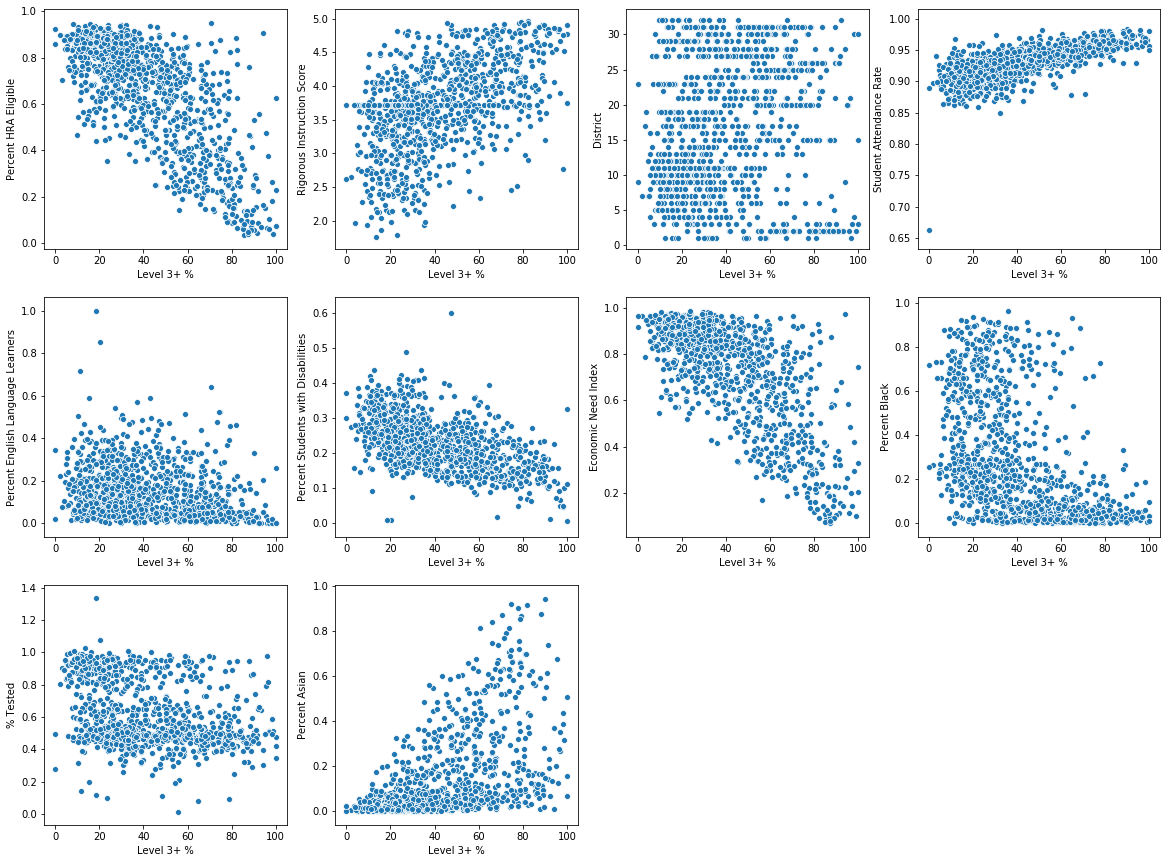

In [32]:
plt.figure(figsize=(20, 15))
for row, col in enumerate(list(svm_feat_imp['Feature'][-10:].values)):
    plt.subplot(3, 4, row+1)
    sns.scatterplot(nyc_schools_math['Level 3+ %'],
                    nyc_schools_math[col])